In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from pathlib import Path

plt.rcParams['figure.figsize'] = (15, 35)

In [52]:
# Set filepath
root = Path(r'C:\Users\kmu\PycharmProjects\avalanche_ml')
f1_file = root / 'output/_sk-classifier_f1.csv'
pred_file = root / 'output/_sk-classifier_pred.csv'
importances_file = root / 'output/_sk-classifier_importances.csv'

In [36]:
# Read F1 score file
f1_df = pd.read_csv(f1_file, sep=';', header=[0], index_col=[0, 1, 2, 3])
f1_df.head()

f1  precision    recall  rmse   0
          attribute         label                                             
CLASS NaN danger_level      1          0.820788   0.831254  0.810717   NaN NaN
                            2          0.811196   0.793988  0.829461   NaN NaN
                            3          0.676428   0.697061  0.658017   NaN NaN
                            4          0.373360   0.441314  0.324734   NaN NaN
          emergency_warning Ikke gitt  0.951033   0.926102  0.977409   NaN NaN

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

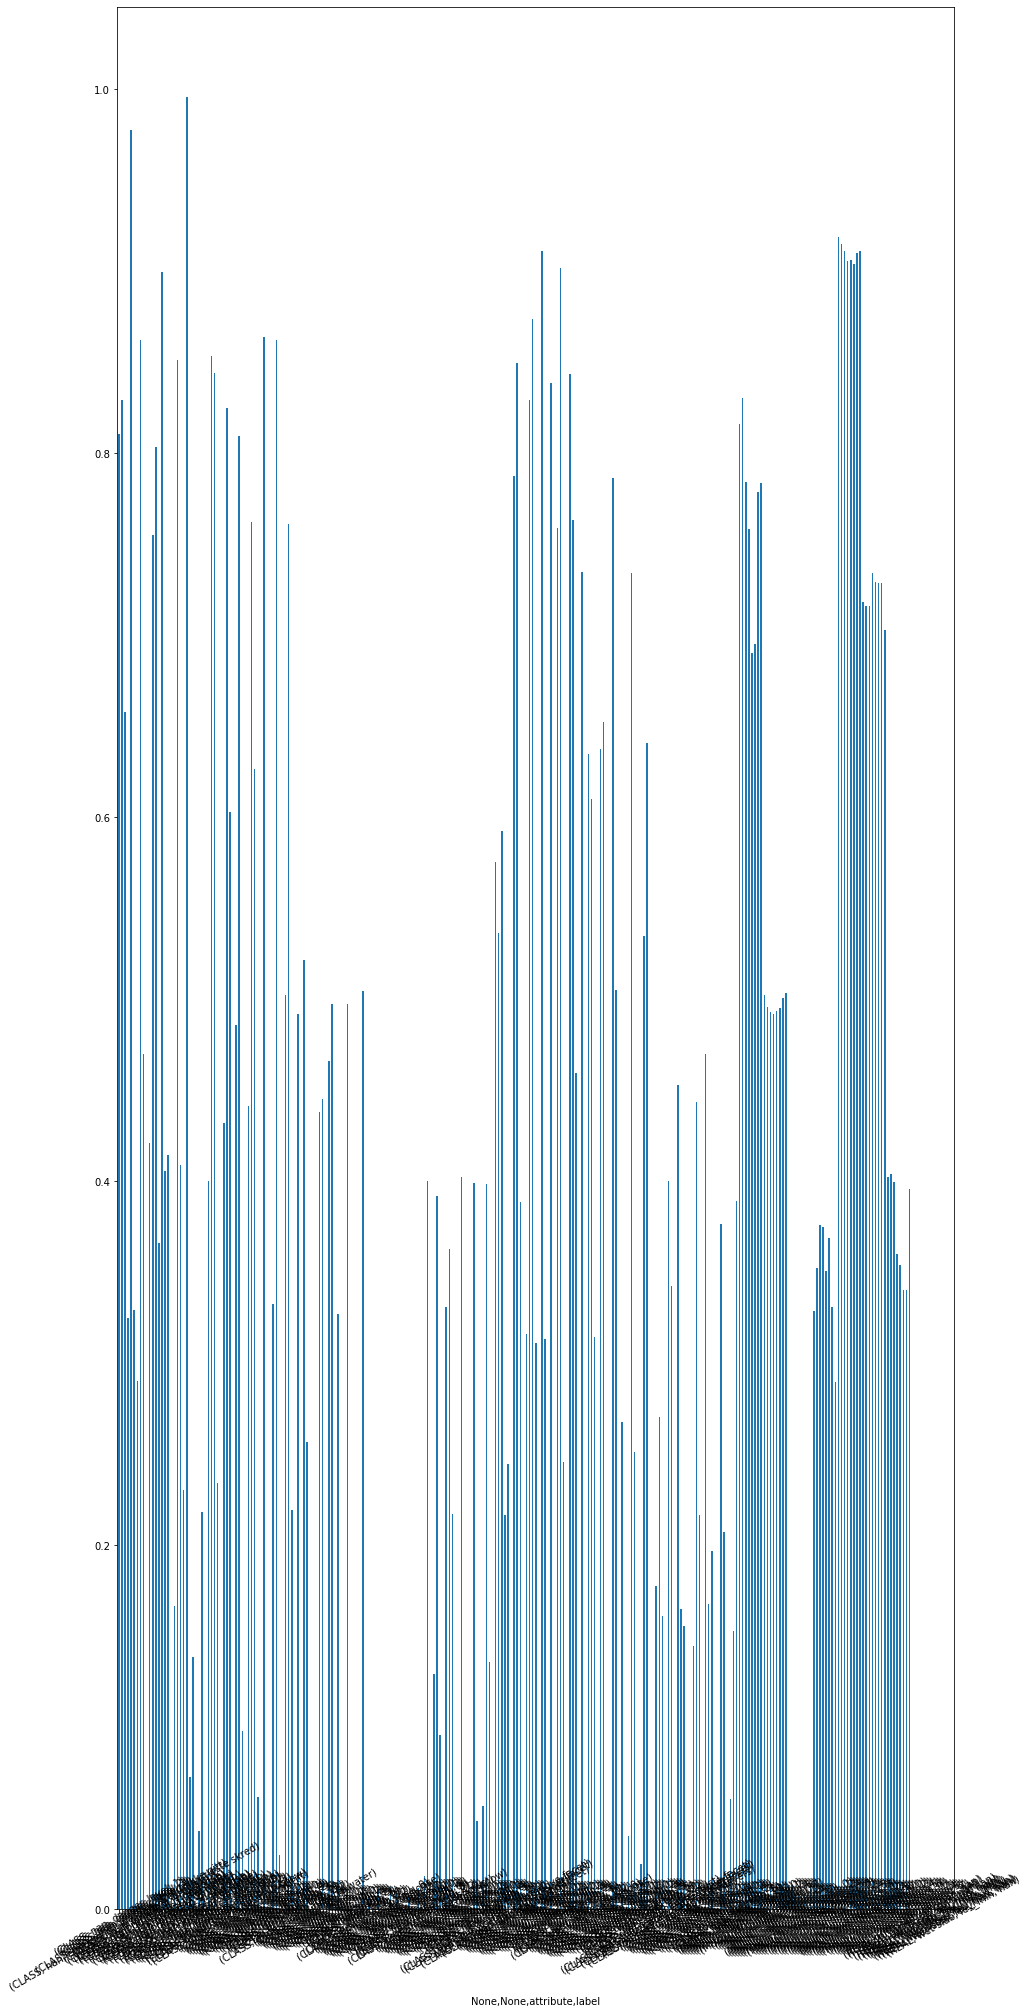

In [63]:
f1_df.recall.plot(kind='bar')
plt.xticks(rotation=30, horizontalalignment="center")


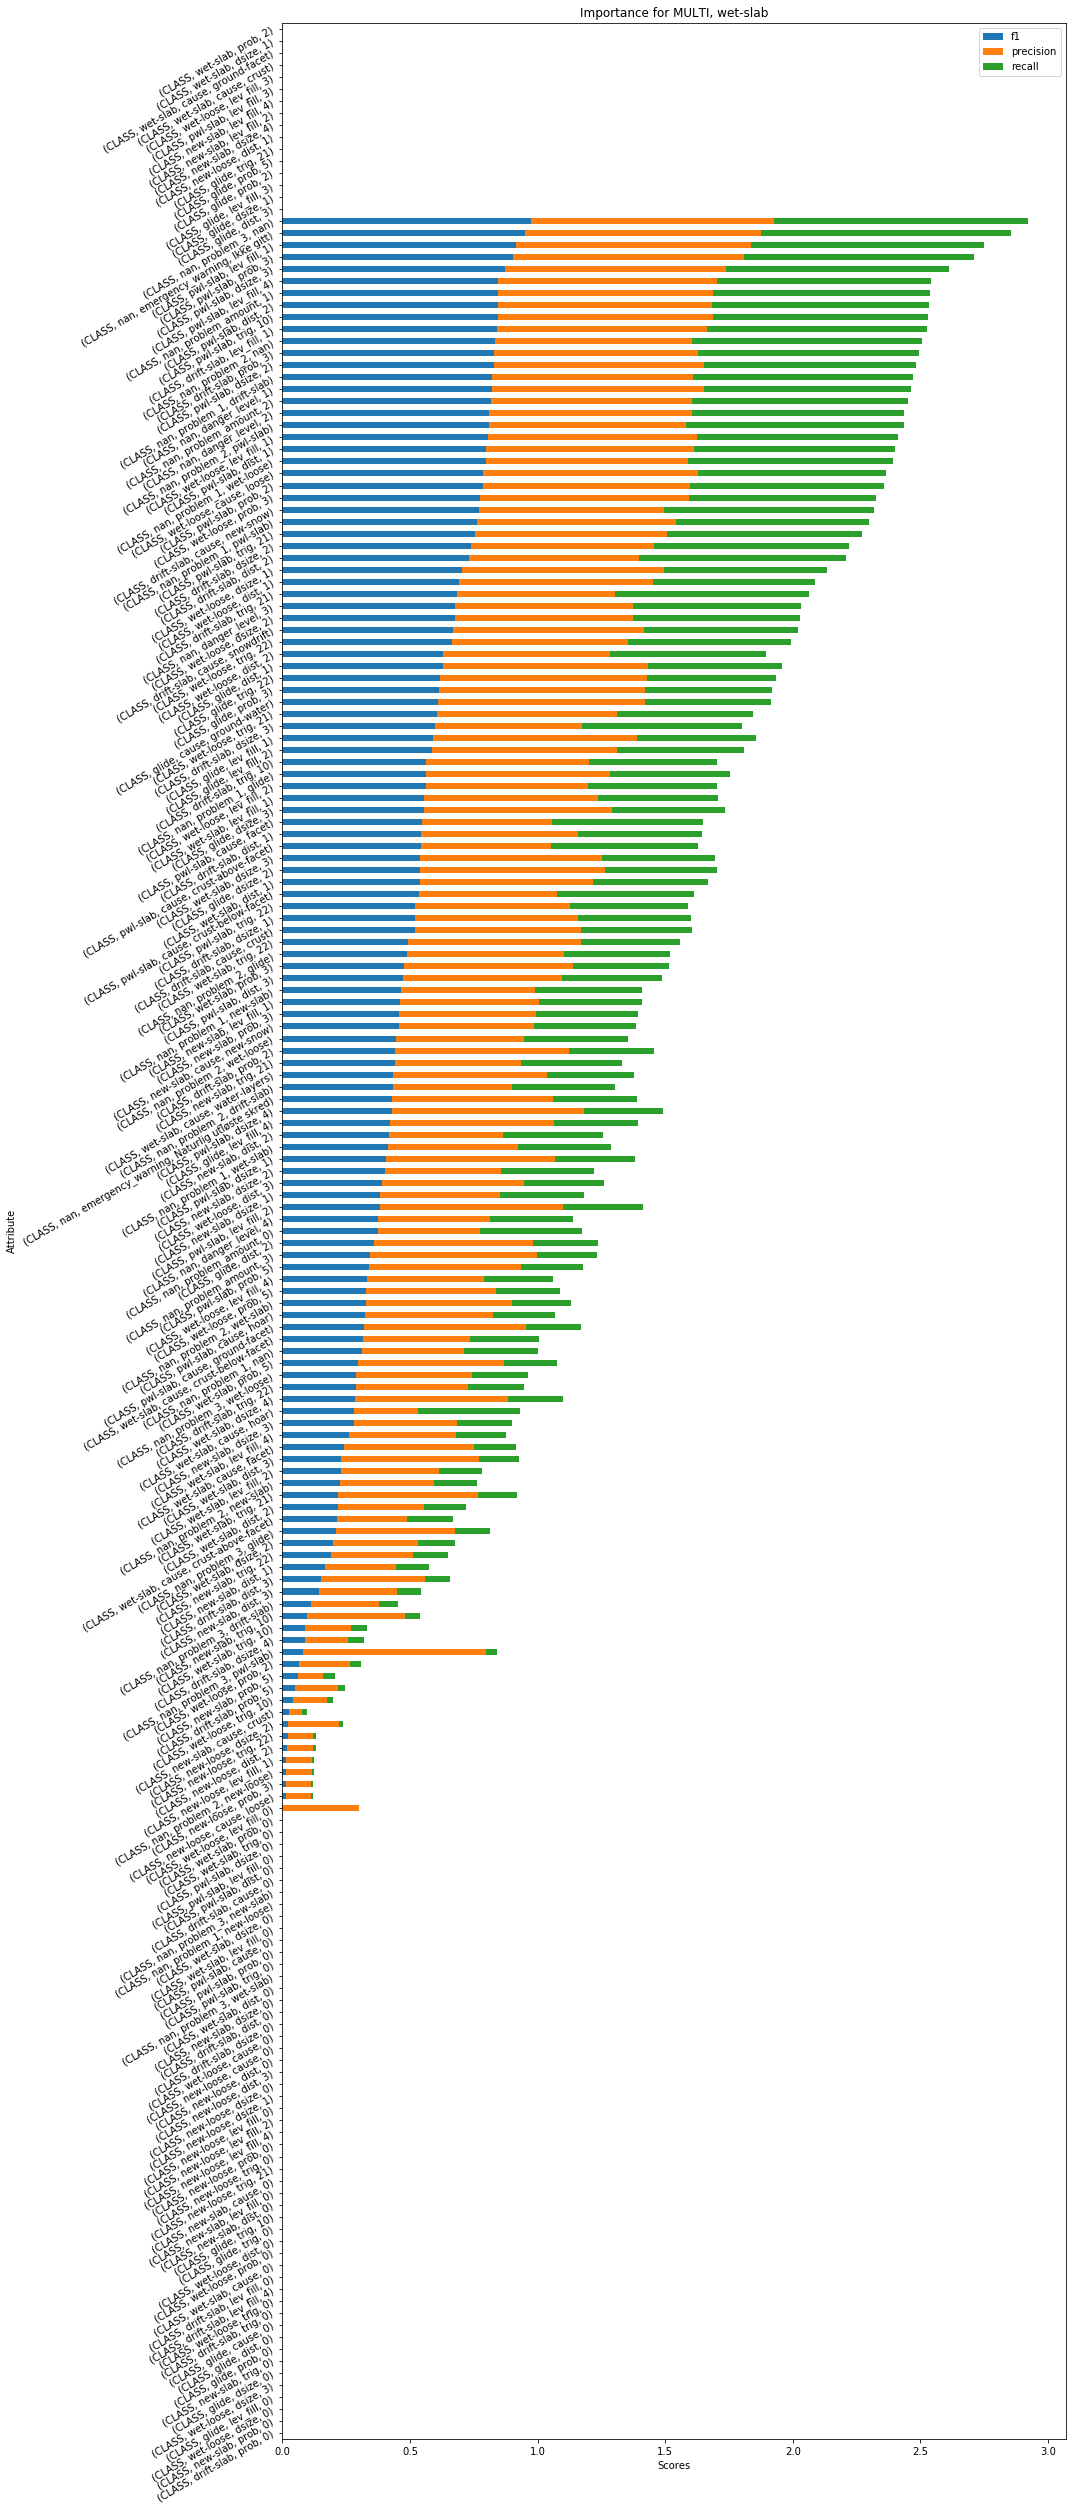

In [87]:
_f1_df = f1_df.drop(['REAL', 'MULTI']).sort_values(by='f1', axis='index')
_ax1 = _f1_df[['f1', 'precision', 'recall']].plot(kind='barh', stacked=True, figsize=(15, 30))
_ax1.set(xlabel = 'Scores',
         ylabel = 'Attribute',
         title = 'Importance for {0}, {1}'.format(c[0], c[1]))
plt.yticks(rotation=30)
plt.tight_layout()
plt.savefig('scores.pdf')

In [55]:
# Read importance file
importances_df = pd.read_csv(importances_file, sep=';', header=[0, 1], index_col=[0, 1])
importances_df.head()

CLASS                                      \
                   Unnamed: 2_level_1 drift-slab glide new-loose new-slab   
feature_name   day                                                          
region_id_3001 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3002 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3003 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3004 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3005 0                  0.0        0.0   0.0       0.0      0.0   

                                                     MULTI                  \
                    pwl-slab wet-loose wet-slab drift-slab glide new-loose   
feature_name   day                                                           
region_id_3001 0    0.000000       0.0      0.0        0.0   0.0       0.0   
region_id_3002 0    0.000000       0.0      0.0        0.0   0.0       0.0   
region_id_3003 0    0.001267       0.0      0.0        0.0   0.0       0.0   
region_id_3004 0    0.000000       0.0      0.0        0.0   0.0       0.0   
region_id_3005 0    0.000000       0.0      0.0        0.0   0.0       0.0   

                                                         
                   new-slab pwl-slab wet-loose wet-slab  
feature_name   day                                       
region_id_3001 0        0.0      0.0       0.0      0.0  
region_id_3002 0        0.0      0.0       0.0      0.0  
region_id_3003 0        0.0      0.0       0.0      0.0  
region_id_3004 0        0.0      0.0       0.0      0.0  
region_id_3005 0        0.0      0.0       0.0      0.0

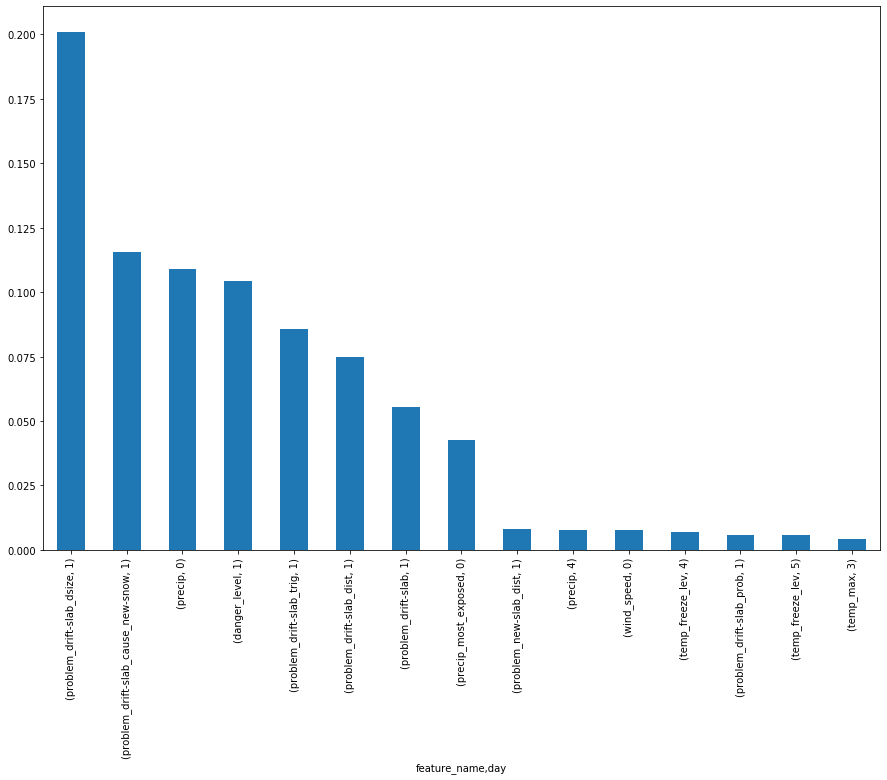

In [77]:
_df = importances_df.nlargest(15, ('CLASS', 'drift-slab'), keep='all')
_df[('CLASS', 'drift-slab')].plot(kind='bar', figsize=(15, 10))
plt.xlabel = 'Importance'
plt.ylabel = 'Feature'
plt.savefig('importance.pdf')

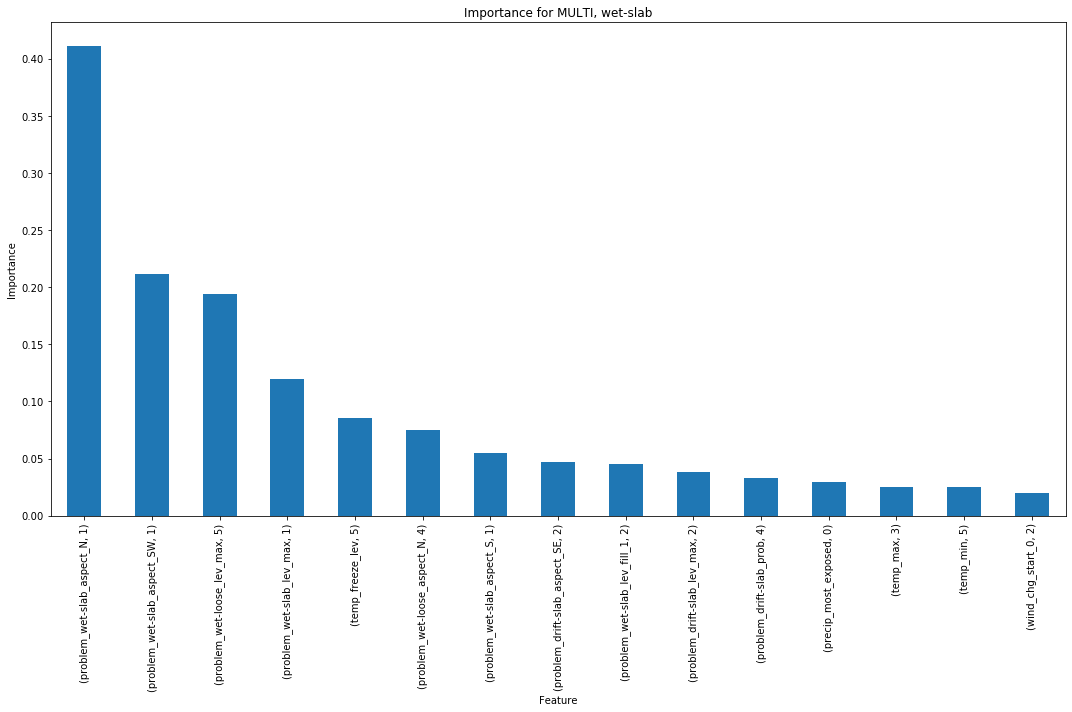

In [84]:
for c in importances_df.columns:
    _df = importances_df.nlargest(15, c, keep='all')
    _ax2 = _df[c].plot(kind='bar', figsize=(15, 10))
    _ax2.set(xlabel = 'Feature',
             ylabel = 'Importance',
             title = 'Importance for {0}, {1}'.format(c[0], c[1]))
    plt.tight_layout()
    plt.savefig('importance_{0}_{1}.pdf'.format(c[0], c[1]))

In [80]:
a = importances_df.columns[0][1]